# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "HTTP://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key
print(url)

HTTP://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aac75d82d9ad612e58ecdddb1b2b6085


In [25]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url)
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | panlaitan
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | manta
Processing Record 6 of Set 1 | guerande
Processing Record 7 of Set 1 | grand centre
City not found. Skipping...
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | halalo
City not found. Skipping...
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | suriapet
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | tevaitoa
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | luderitz
Processing Record 22

Processing Record 38 of Set 4 | port alfred
Processing Record 39 of Set 4 | pemangkat
Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | salym
Processing Record 42 of Set 4 | geresk
City not found. Skipping...
Processing Record 43 of Set 4 | olafsvik
Processing Record 44 of Set 4 | enshi
Processing Record 45 of Set 4 | evensk
Processing Record 46 of Set 4 | paamiut
Processing Record 47 of Set 4 | half moon bay
Processing Record 48 of Set 4 | slave lake
Processing Record 49 of Set 4 | ancud
Processing Record 0 of Set 5 | grindavik
Processing Record 1 of Set 5 | barrhead
Processing Record 2 of Set 5 | lolua
City not found. Skipping...
Processing Record 3 of Set 5 | consett
Processing Record 4 of Set 5 | zhanakorgan
Processing Record 5 of Set 5 | catamarca
Processing Record 6 of Set 5 | namatanai
Processing Record 7 of Set 5 | bardiyah
Processing Record 8 of Set 5 | aripuana
Processing Record 9 of Set 5 | carnarvon
Processing Record 10 of Set 5 | yarada
Processing Rec

Processing Record 29 of Set 8 | panzhihua
Processing Record 30 of Set 8 | ilhabela
Processing Record 31 of Set 8 | nakatunguru
Processing Record 32 of Set 8 | salaspils
Processing Record 33 of Set 8 | daru
Processing Record 34 of Set 8 | puerto carreno
Processing Record 35 of Set 8 | jackson
Processing Record 36 of Set 8 | saint-denis
Processing Record 37 of Set 8 | veraval
Processing Record 38 of Set 8 | nanortalik
Processing Record 39 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 8 | zhemchuzhnyy
City not found. Skipping...
Processing Record 41 of Set 8 | voznesenye
Processing Record 42 of Set 8 | kuminskiy
Processing Record 43 of Set 8 | henties bay
Processing Record 44 of Set 8 | lavrentiya
Processing Record 45 of Set 8 | shimoda
Processing Record 46 of Set 8 | samusu
City not found. Skipping...
Processing Record 47 of Set 8 | rocha
Processing Record 48 of Set 8 | toamasina
Processing Record 49 of Set 8 | te kauwhata
Processing Record 0 of Set 9 | p

City not found. Skipping...
Processing Record 15 of Set 12 | kedougou
Processing Record 16 of Set 12 | gasa
Processing Record 17 of Set 12 | gokak
Processing Record 18 of Set 12 | pacific grove
Processing Record 19 of Set 12 | bocas del toro
Processing Record 20 of Set 12 | gremyachinsk
Processing Record 21 of Set 12 | alta floresta
Processing Record 22 of Set 12 | richards bay
Processing Record 23 of Set 12 | padang
Processing Record 24 of Set 12 | poso
Processing Record 25 of Set 12 | bourail
Processing Record 26 of Set 12 | williamsport
Processing Record 27 of Set 12 | tual
Processing Record 28 of Set 12 | maningrida
Processing Record 29 of Set 12 | nola
Processing Record 30 of Set 12 | barsovo
Processing Record 31 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 32 of Set 12 | oranjemund
Processing Record 33 of Set 12 | nelson bay
Processing Record 34 of Set 12 | ishigaki
Processing Record 35 of Set 12 | balabac
Processing Record 36 of Set 12 | hihifo
City not f

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6145,-37.6368,20.82,91,65,4.61,GL,1681441030
1,panlaitan,12.1191,119.8486,82.47,74,100,4.56,PH,1681441089
2,tuktoyaktuk,69.4541,-133.0374,-2.20,71,20,5.75,CA,1681441089
3,mataura,-46.1927,168.8643,63.81,59,0,7.92,NZ,1681441089
4,manta,-0.9500,-80.7333,80.38,89,20,6.91,EC,1681440308


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tasiilaq,65.6145,-37.6368,20.82,91,65,4.61,GL,1681441030
1,panlaitan,12.1191,119.8486,82.47,74,100,4.56,PH,1681441089
2,tuktoyaktuk,69.4541,-133.0374,-2.20,71,20,5.75,CA,1681441089
3,mataura,-46.1927,168.8643,63.81,59,0,7.92,NZ,1681441089
4,manta,-0.9500,-80.7333,80.38,89,20,6.91,EC,1681440308


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

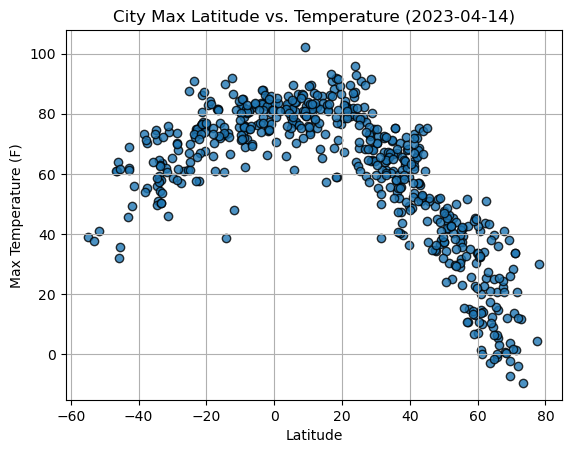

In [47]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor ="black", linewidth = 1, marker="o", alpha = 0.8, label= "Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature (2023-04-14)")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

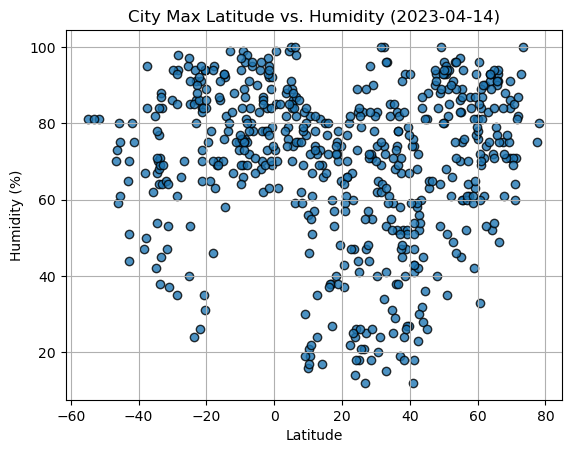

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor ="black", linewidth = 1, marker="o", alpha = 0.8, label= "Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity (2023-04-14)")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

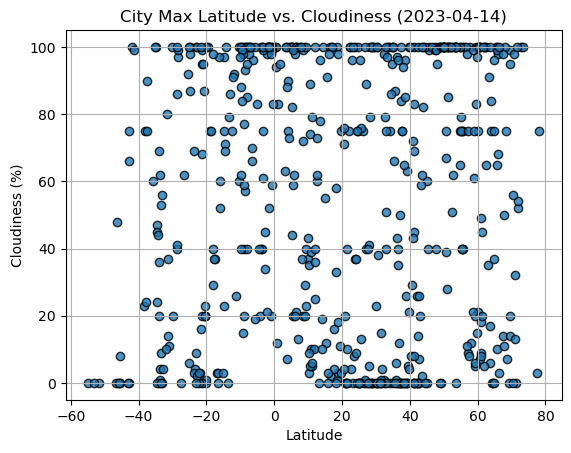

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor ="black", linewidth = 1, marker="o", alpha = 0.8, label= "Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness (2023-04-14)")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

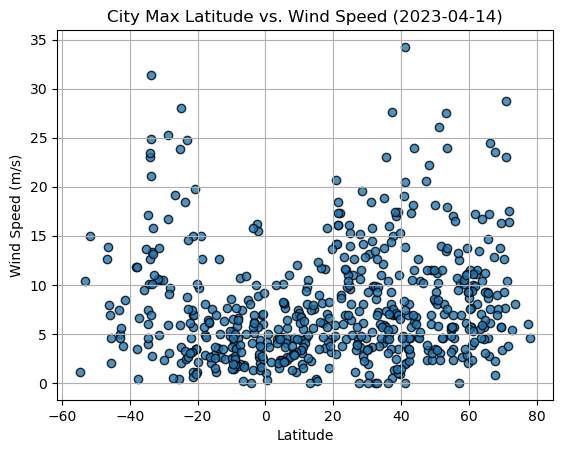

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor ="black", linewidth = 1, marker="o", alpha = 0.8, label= "Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed (2023-04-14)")
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [95]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_lable, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Clculate the regression line "y-values" from the slope and intercept
    regress_values = slope * x_values + intercept
    # Define equation of line
    line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))
    
    # Define Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color ="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_lable)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tasiilaq,65.6145,-37.6368,20.82,91,65,4.61,GL,1681441030
1,panlaitan,12.1191,119.8486,82.47,74,100,4.56,PH,1681441089
2,tuktoyaktuk,69.4541,-133.0374,-2.20,71,20,5.75,CA,1681441089
5,guerande,47.3291,-2.4283,49.46,90,100,20.56,FR,1681441090
6,bethel,41.3712,-73.4140,73.29,41,0,1.99,US,1681441090


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,mataura,-46.1927,168.8643,63.81,59,0,7.92,NZ,1681441089
4,manta,-0.9500,-80.7333,80.38,89,20,6.91,EC,1681440308
7,ushuaia,-54.8000,-68.3000,38.86,81,0,1.14,AR,1681440812
8,esperance,-33.8667,121.9000,58.37,64,69,31.43,AU,1681441091
11,east london,-33.0153,27.9116,63.75,64,56,15.82,ZA,1681440948


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8841682686929102


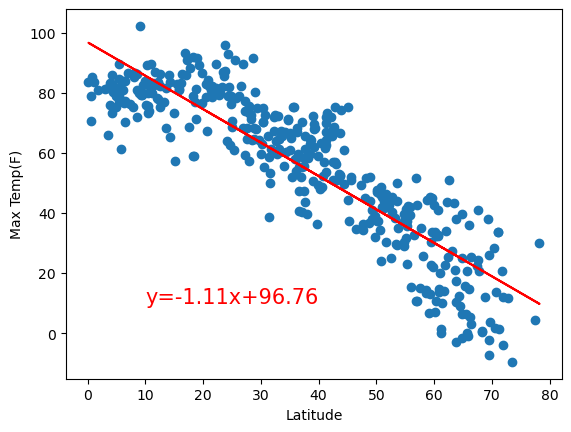

In [100]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp(F)" , (10,10))


The r-value is: 0.7037968918229036


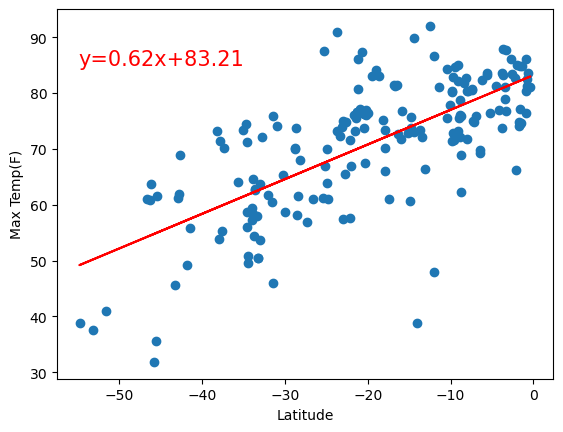

In [101]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp(F)" , (-55,85))


**Discussion about the linear relationship:** 
For the Northern Hemisphere, the equation y = -1.11x + 96.76 suggests that there is a negative linear relationship between Temperature and Latitude, with y decreasing by 1.11 units for each unit increase in x.
For the Southern Hemisphere, the equation y = 0.62x + 83.21 suggests that there is a positive linear relationship between Temperature and Latitude, with y increasing by 0.62 units for each unit increase in x.
Both of r-value is near prefect, which means Temperature and Latitude have strong relationship with each other.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19553595743809585


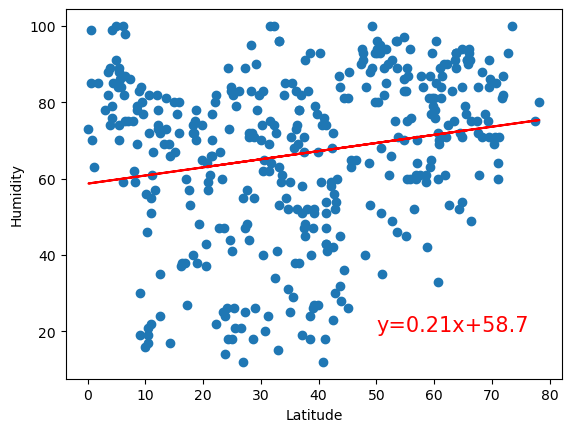

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity" , (50,20))

The r-value is: 0.29239784334626406


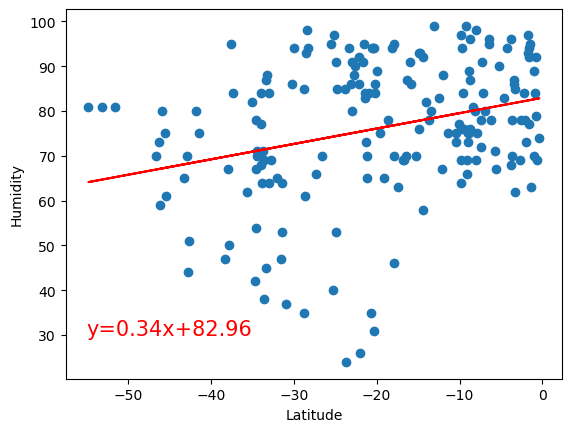

In [108]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity" , (-55,30))

**Discussion about the linear relationship:** Form the scatters above we could tell, both Northern and Southern Hemisphere has a positive linear relationship between Latitude and Humidity. And R-values for both Northern and Southern Hemisphere indicate there is weak relationship between Humidity and Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05836142198368338


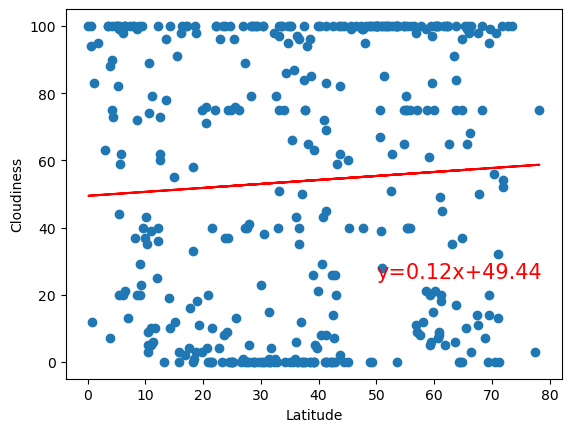

In [113]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness" , (50,25))

The r-value is: 0.4256432260958128


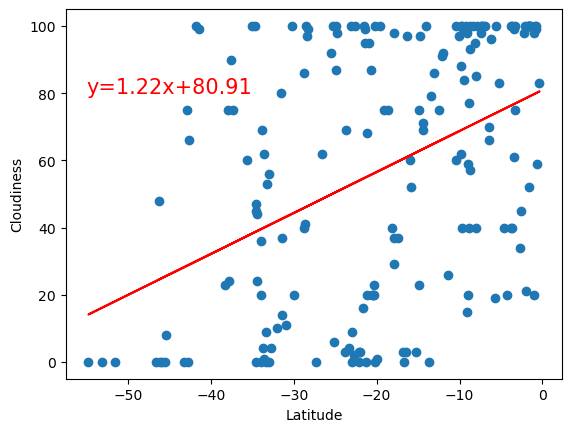

In [114]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness" , (-55,80))

**Discussion about the linear relationship:** Above two scatters show both Northern and Southern Hemisphere has a positive linear relationship between Latitude and Cloudiness.However, Souther Hemisphere R-values show stronger relationship between Cloudiness and Latitude than Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.23008672616326176


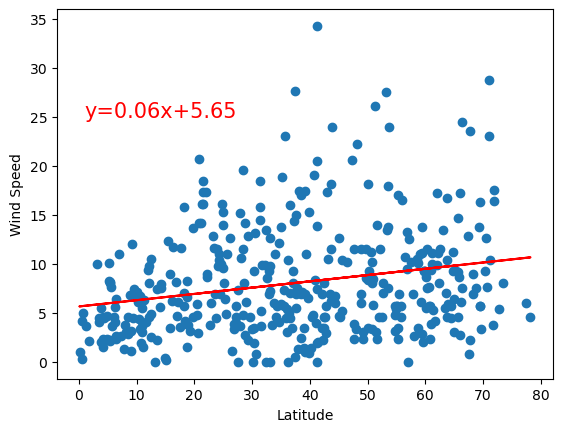

In [116]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed" , (1,25))

The r-value is: -0.31186848942799056


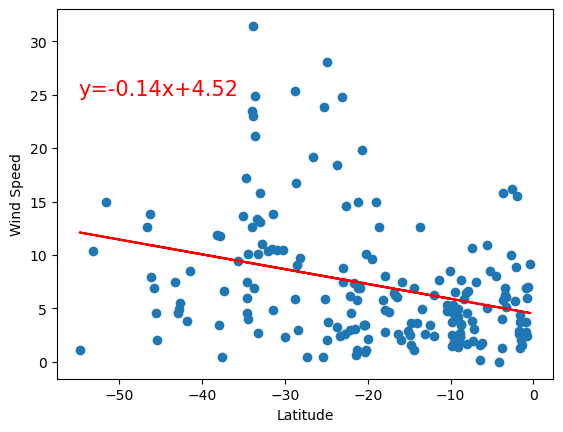

In [118]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed" , (-55,25))

**Discussion about the linear relationship:**  For the Northern Hemisphere, the equation y = 0.06x+5.65 suggests that there is a positive linear relationship between Wind Speed and Latitude, with y decreasing by 1.11 units for each unit increase in x. For the Southern Hemisphere, the equation y = -0.14x + 4.52 suggests that there is a negative linear relationship between Wind Speed and Latitude, with y increasing by 0.62 units for each unit increase in x. Both r-value shows Speed and Latitude have weak relationship with each other.